In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
current_directory = os.getcwd()

In [3]:
os.chdir('images')

In [4]:
images = {}
data_directory = os.getcwd()

for filename in os.listdir():
    if not '.PNG' in filename:
        folder_name = filename
        
        os.chdir(folder_name)
        images[folder_name] = {}
        
        for image_name in os.listdir():
            image = plt.imread(image_name)
            images[folder_name][image_name] = image
            
        os.chdir(data_directory)

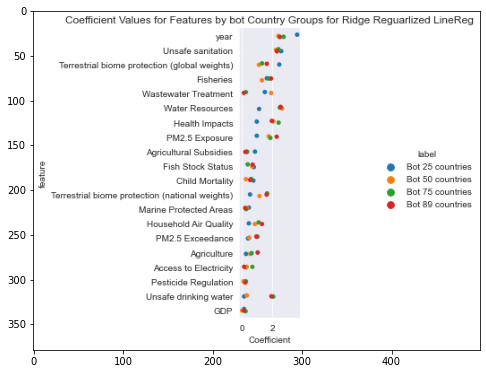

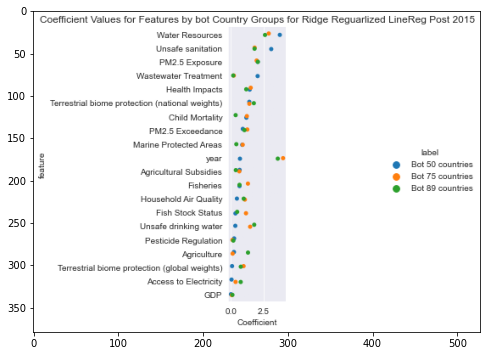

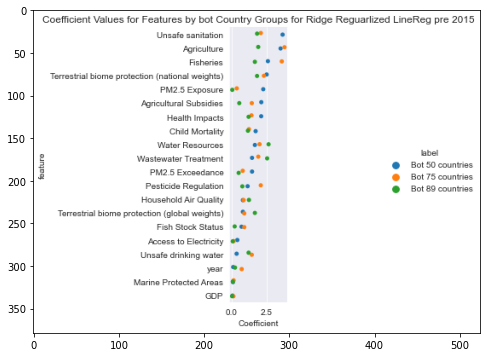

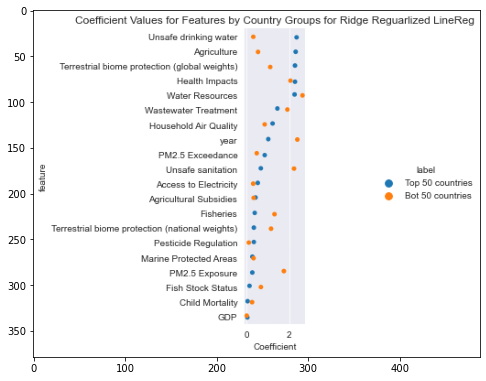

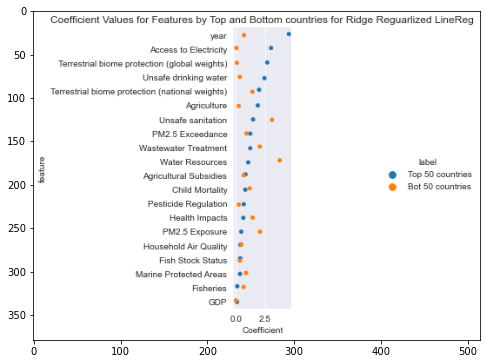

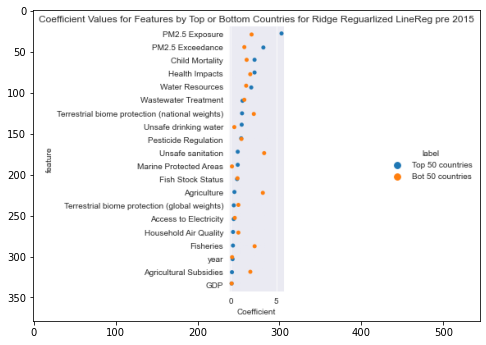

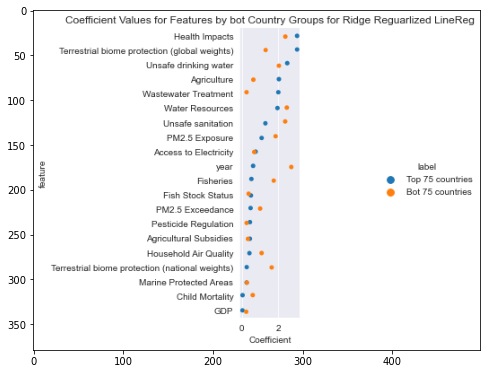

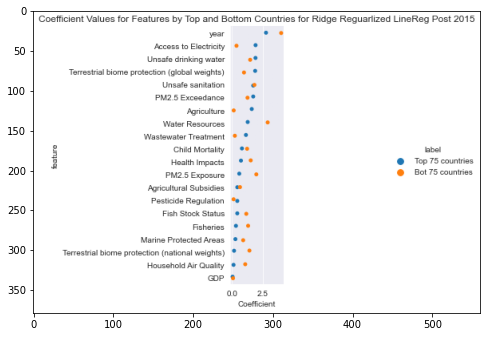

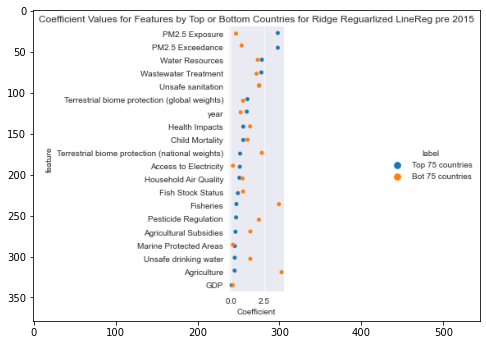

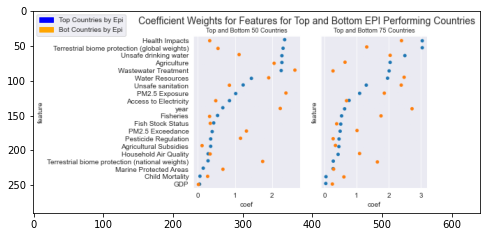

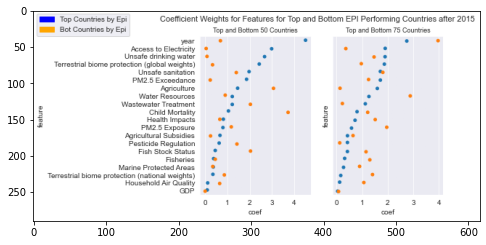

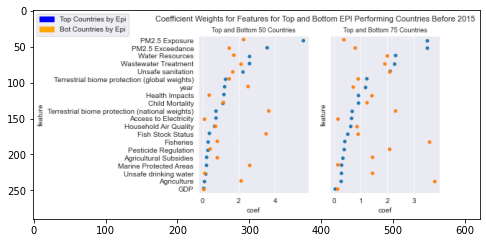

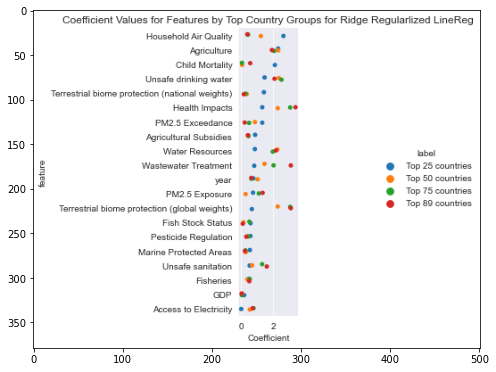

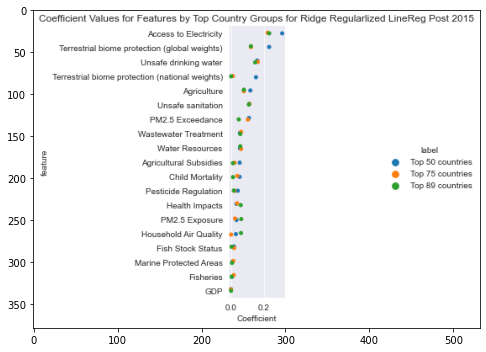

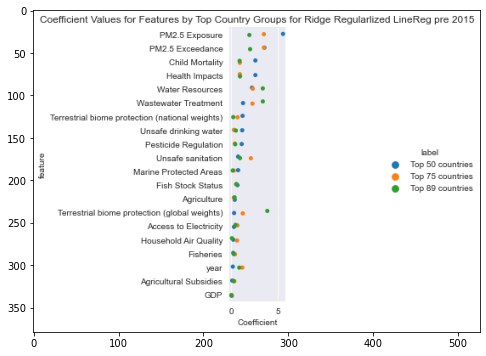

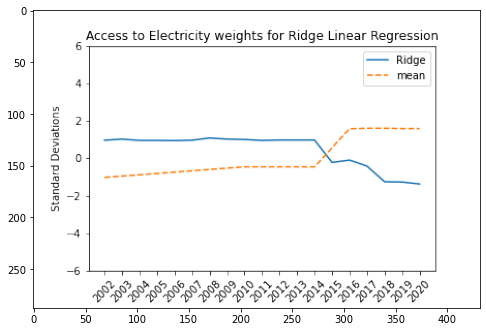

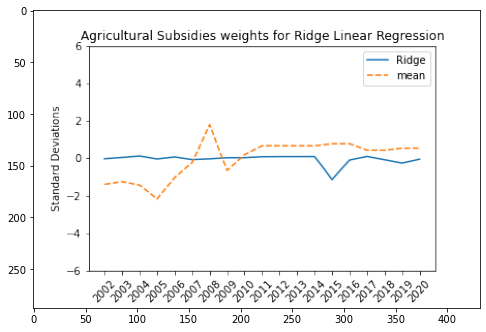

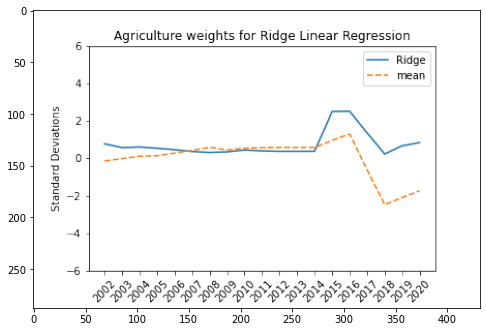

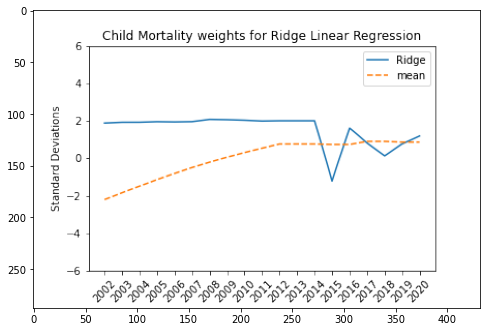

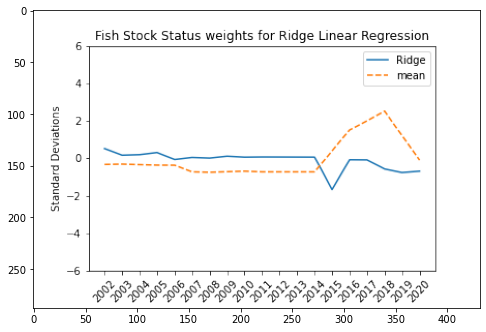

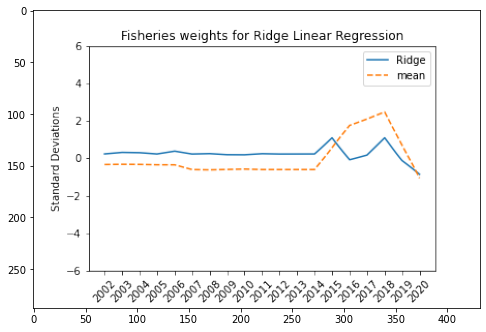

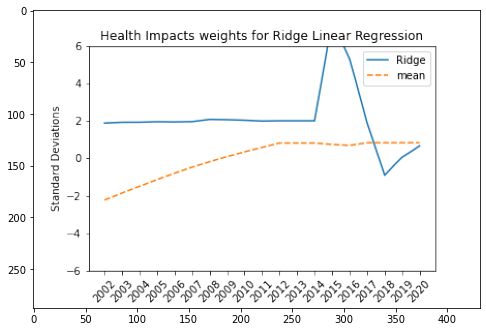

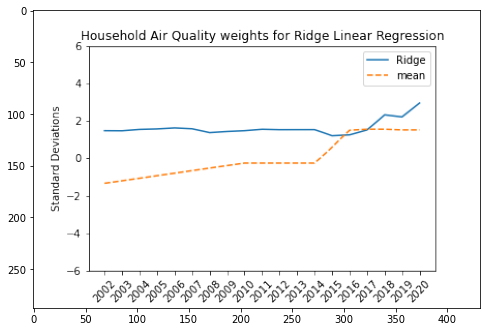

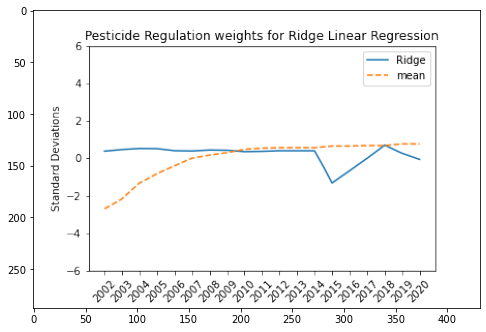

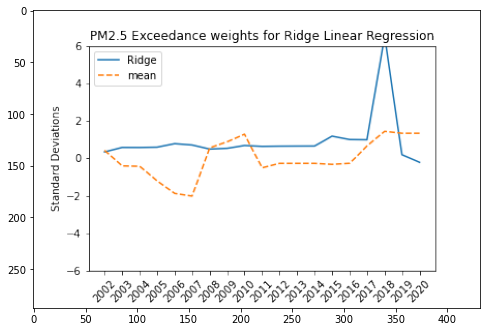

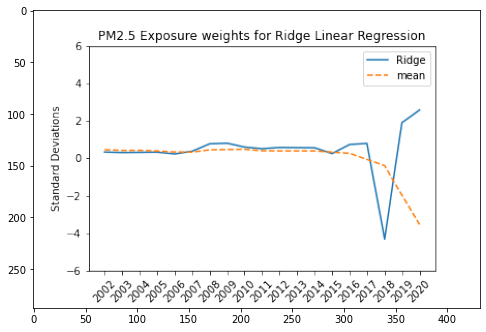

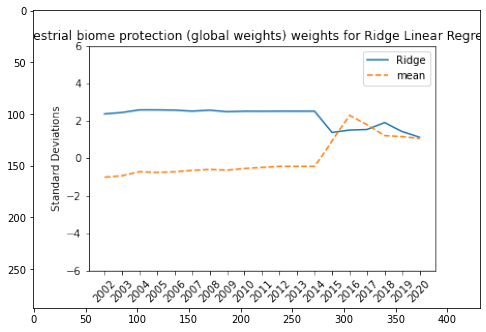

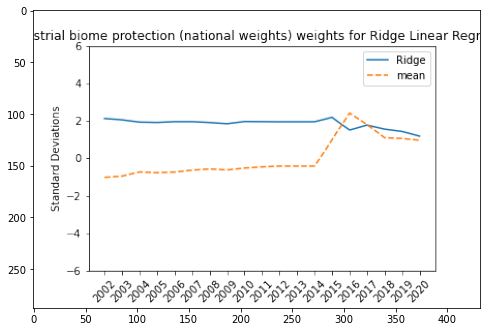

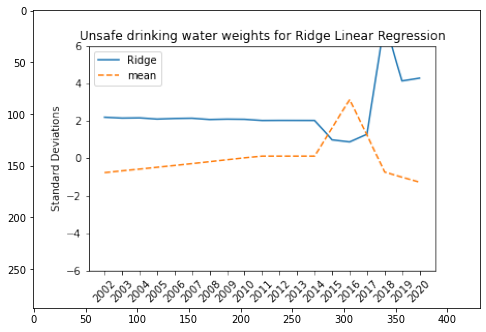

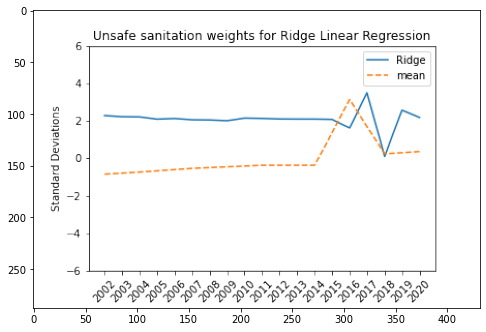

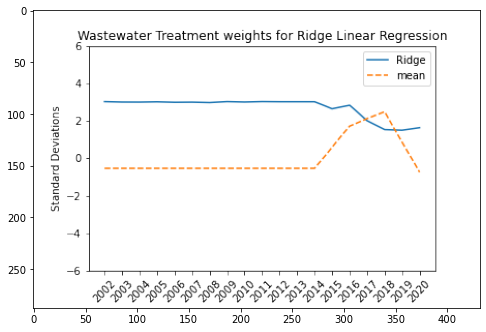

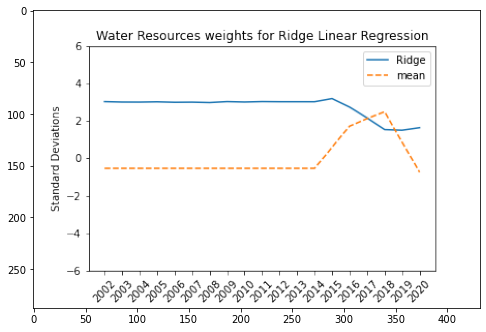

In [6]:
for folder in list(images.keys()):
    for name, image in images[folder].items():
        if 'Ridge' in name:
            plt.figure(figsize = (8, 12))
            plt.imshow(image)

            plt.show()